In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yfin

yfin.pdr_override()
import datetime as dt
start=dt.datetime(2012,1,1)
end=dt.datetime(2020,1,1)
data = yfin.download('TSLA',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
#data
#df=data.set_index(pd.DatetimeIndex(data['date'].values))
df=data
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500
2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500


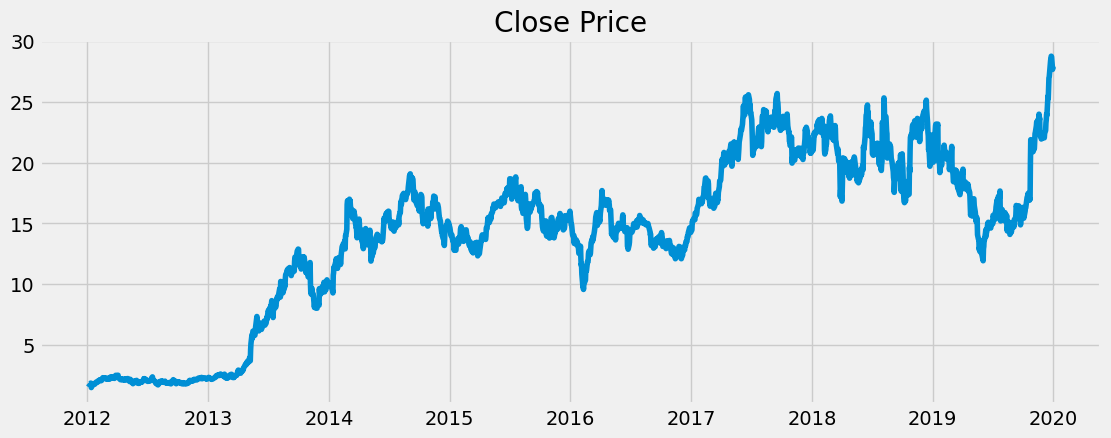

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.title("Close Price")
plt.plot(df['Close'])
plt.show()

In [ ]:
#three moving avg
# short/fast exponential moving average
ShortEMA=df.Close.ewm(span=5,adjust=False).mean()
#the middle/medium exponential moving average
MiddleEMA=df.Close.ewm(span=21,adjust=False).mean()
#long/slow ema
LongEMA=df.Close.ewm(span=63,adjust=False).mean()

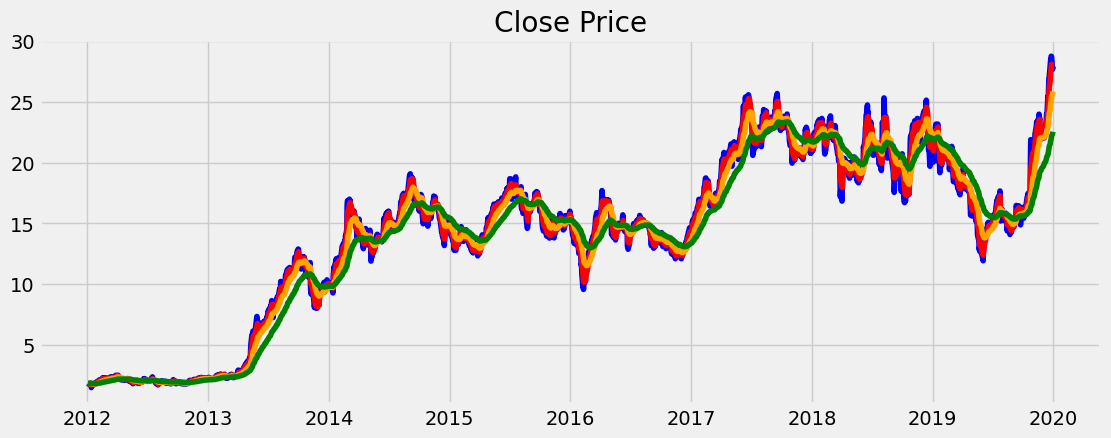

In [ ]:
plt.figure(figsize=(12.2,4.5))
plt.title("Close Price")
plt.plot(df['Close'],color='blue')
plt.plot(ShortEMA,color='red')
plt.plot(MiddleEMA,color='orange')
plt.plot(LongEMA,color='green')
plt.show()

In [ ]:
# add the ema to data set
df['Short']=ShortEMA
df['Middle']=MiddleEMA
df['Long']=LongEMA

In [ ]:
#function to buy and sell stock
def buy_sell_function(dataa):
  buy_list=[]
  sell_list=[]
  flag_long=False
  flag_short=False

  for i in range(0,len(dataa)):
    if dataa['Middle'][i]<dataa['Long'][i] and dataa['Short'][i]<dataa['Middle'][i] and flag_long==False and flag_short==False:
      buy_list.append(dataa['Close'][i])
      sell_list.append(np.nan)
      flag_short=True
    elif flag_short==True and dataa['Short'][i]>dataa['Middle'][i]:
      sell_list.append(dataa['Close'][i])
      buy_list.append(np.nan)
      flag_short=False
    elif dataa['Middle'][i]>dataa['Long'][i] and dataa['Short'][i]>dataa['Middle'][i] and flag_long==False and flag_short==False:
      buy_list.append(dataa['Close'][i])
      sell_list.append(np.nan)
      flag_long=True
    elif flag_long==True and dataa['Short'][i]<dataa['Middle'][i]:
      sell_list.append(dataa['Close'][i])
      buy_list.append(np.nan)
      flag_long=False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)

  return (buy_list, sell_list)




In [ ]:
# add the signals to dataset

df['Buy']=buy_sell_function(df)[0]
df['Sell']=buy_sell_function(df)[1]

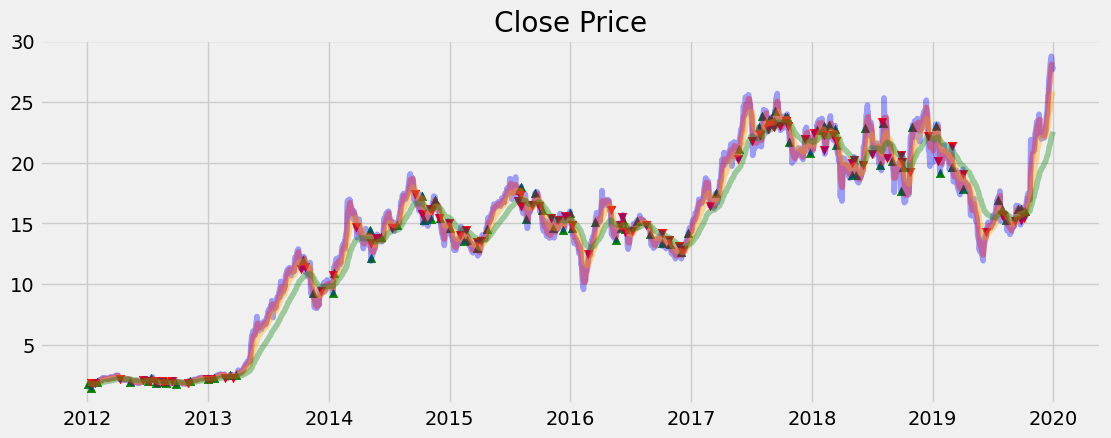

In [ ]:
#Visually show the signals
plt.figure(figsize=(12.2,4.5))
plt.title("Close Price")
plt.plot(df['Close'],color='blue',alpha=0.35)
plt.plot(ShortEMA,color='red',alpha=0.35)
plt.plot(MiddleEMA,color='orange',alpha=0.35)
plt.plot(LongEMA,color='green',alpha=0.35)
plt.scatter(df.index,df['Buy'],color='green',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',marker='v',alpha=1)
plt.show()
